<a href="https://colab.research.google.com/github/sainathss97/TensorFlow_practice/blob/main/CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
from tensorflow.keras.datasets import cifar10
# loading the dataset 
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

Steps to Follow
1. Visulaize an Image
2. Get class Names
3. Normalize data
4. One Hot our labels (I generally use Sparse Categorical Data)
5. Build the Model
6. Fit the Model
7. Evaluate

In [28]:
(X_train.shape,y_train.shape),(X_test.shape,y_test.shape)

(((50000, 32, 32, 3), (50000, 1)), ((10000, 32, 32, 3), (10000, 1)))

In [29]:
import numpy as np
class_names = list(set(np.squeeze(y_train)))
class_names

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [30]:
class_dict={0:'airplane' ,
1:'automobile' ,
2:'bird' ,
3:'cat' ,
4:'deer' ,
5:'dog' ,
6:'frog' ,
7:'horse' ,
8:'ship' ,
9:'truck'}
class_dict

{0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck'}

In [31]:

import tensorflow as tf
import random
random.seed(42)
num = random.randint(0,len(X_train))

pred_img = X_train[num]
label= y_train[num][0]

(-0.5, 31.5, 31.5, -0.5)

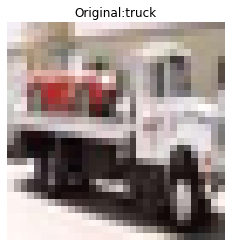

In [32]:
import matplotlib.pyplot as plt

plt.imshow(pred_img)
plt.title(f"Original:{class_dict[label]}")
plt.axis(False)

## 3. Normalize data


In [33]:
def normalize(data):
  data = data/255.
  print(data.shape)
  return data

In [34]:
X_train_norm = normalize(X_train)
X_test_norm = normalize(X_test)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


##5. Build The Model

In [35]:
from tensorflow.keras import  Sequential
from tensorflow.keras.layers import  Dense,Conv2D,Flatten,MaxPool2D
from tensorflow.keras.optimizers import Adam

model_1 = Sequential([
                      Conv2D(filters=10,kernel_size = 3,input_shape=(32, 32, 3),activation='relu'),
                      Conv2D(10,3,activation='relu'),
                      MaxPool2D(pool_size =2),
                      
                      Conv2D(filters=10,kernel_size = 3,input_shape=(32, 32, 3),activation='relu'),
                      Conv2D(10,3,activation='relu'),
                      MaxPool2D(pool_size =2),
                      
                      Flatten(),

                      Dense(10,activation='softmax')
])


model_1.compile(loss='sparse_categorical_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])


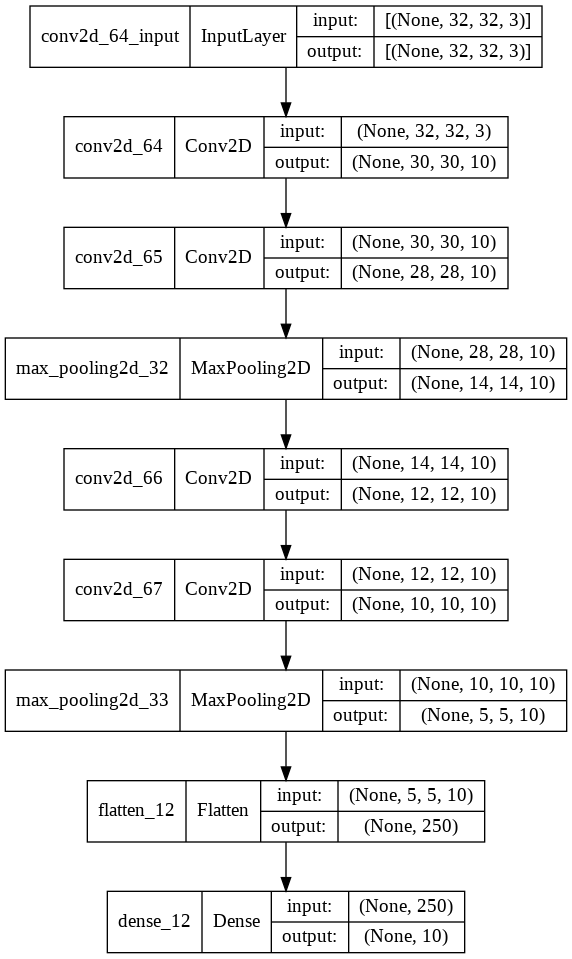

In [36]:
from tensorflow.keras.utils import plot_model
plot_model(model_1,show_shapes=True)

In [37]:
model_1.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_64 (Conv2D)          (None, 30, 30, 10)        280       
                                                                 
 conv2d_65 (Conv2D)          (None, 28, 28, 10)        910       
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 14, 14, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_66 (Conv2D)          (None, 12, 12, 10)        910       
                                                                 
 conv2d_67 (Conv2D)          (None, 10, 10, 10)        910       
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 5, 5, 10)         0         
 g2D)                                                

In [38]:

history_1 = model_1.fit(X_train_norm,y_train,
                        epochs=10,
                        batch_size=32,
                        validation_data=(X_test_norm,y_test))

Epoch 1/10
1563/1563 [==============================] - 12s 7ms/step - loss: 1.7181 - accuracy: 0.3709 - val_loss: 1.5149 - val_accuracy: 0.4448
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4412 - accuracy: 0.4771 - val_loss: 1.3904 - val_accuracy: 0.4953
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.3325 - accuracy: 0.5225 - val_loss: 1.3097 - val_accuracy: 0.5304
Epoch 4/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.2662 - accuracy: 0.5478 - val_loss: 1.2503 - val_accuracy: 0.5552
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.2196 - accuracy: 0.5649 - val_loss: 1.2553 - val_accuracy: 0.5525
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1737 - accuracy: 0.5832 - val_loss: 1.1809 - val_accuracy: 0.5785
Epoch 7/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1415 - accuracy: 0.5990 - val_loss: 1.1284 - val_ac

In [39]:
len(X_train)/32.

1562.5

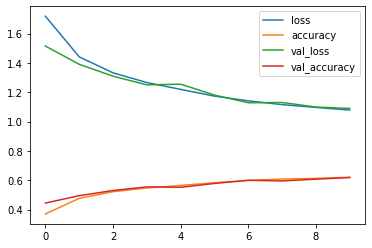

In [40]:
import pandas as pd
pd.DataFrame(history_1.history).plot()

In [57]:
## Hyper Param Tuning
from tensorflow.keras import  Sequential
from tensorflow.keras.layers import  Dense,Conv2D,Flatten,MaxPool2D,Dropout
from tensorflow.keras.optimizers import Adam


model_2 = Sequential([
                      Conv2D(filters=100,kernel_size = 2,input_shape=(32, 32, 3),activation='relu'),
                      Conv2D(75,2,activation='relu'),
                      MaxPool2D(pool_size =2),
                    
                      Conv2D(filters=50,kernel_size = 2,activation='relu'),
                      Conv2D(25,2,activation='relu'),
                      MaxPool2D(pool_size =2,padding='same'),
                      

                      Flatten(),
                      
                      Dense(100,activation='relu'),
                      Dense(75,activation='relu'),
                      Dense(50,activation='relu'),
                      Dense(25,activation='relu'),

                      Dense(10,activation='softmax')
])

model_2.compile(loss='sparse_categorical_crossentropy',
                optimizer=Adam(
                    
                ),
                metrics=['accuracy'])

history_2 =model_2.fit(X_train_norm,y_train,
            epochs=15,
            batch_size=64,
            validation_data=(X_test_norm,y_test))

Epoch 1/15
782/782 [==============================] - 18s 22ms/step - loss: 1.6505 - accuracy: 0.3918 - val_loss: 1.4228 - val_accuracy: 0.4766
Epoch 2/15
782/782 [==============================] - 17s 21ms/step - loss: 1.2590 - accuracy: 0.5441 - val_loss: 1.1386 - val_accuracy: 0.5926
Epoch 3/15
782/782 [==============================] - 17s 21ms/step - loss: 1.0619 - accuracy: 0.6220 - val_loss: 1.0336 - val_accuracy: 0.6417
Epoch 4/15
782/782 [==============================] - 17s 21ms/step - loss: 0.9502 - accuracy: 0.6630 - val_loss: 1.0414 - val_accuracy: 0.6391
Epoch 5/15
782/782 [==============================] - 17s 21ms/step - loss: 0.8714 - accuracy: 0.6906 - val_loss: 0.9087 - val_accuracy: 0.6784
Epoch 6/15
782/782 [==============================] - 17s 21ms/step - loss: 0.8049 - accuracy: 0.7143 - val_loss: 0.9198 - val_accuracy: 0.6904
Epoch 7/15
782/782 [==============================] - 17s 21ms/step - loss: 0.7521 - accuracy: 0.7335 - val_loss: 0.8693 - val_accuracy:

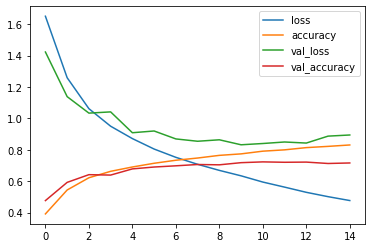

In [58]:
pd.DataFrame(history_2.history).plot()

In [59]:
model_2.evaluate(X_test_norm,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.8944 - accuracy: 0.7162


[0.8943566679954529, 0.7161999940872192]

In [60]:
pred_img_norm = normalize(pred_img)

(32, 32, 3)


In [61]:
value = model_2.predict(tf.expand_dims(pred_img,axis=0))

In [62]:
np.argmax(value)

9

(-0.5, 31.5, 31.5, -0.5)

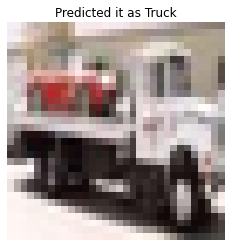

In [63]:
plt.imshow(pred_img)
plt.title(f"Predicted it as {class_dict[np.argmax(value)].title()}")
plt.axis(False)